# Projeto de Conclusão - Sprint 7

## Cab Trips:

### Análise Exploratória de Dados

#### Importando Bibliotecas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Lendo DataFrames:

In [3]:
df_trips = pd.read_csv('datasets/moved_project_sql_result_01.csv')
df_dropoff = pd.read_csv('datasets/moved_project_sql_result_04.csv')
df_result = pd.read_csv('datasets/moved_project_sql_result_07.csv')

In [3]:
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


#### Aplicando o Método Info():

In [5]:
print("Informações de df_trips:")
print()
print(df_trips.info())
print()
print()
print("Informações de df_dropoff:")
print()
print(df_dropoff.info())

Informações de df_trips:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


Informações de df_dropoff:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


* Aplicado método `info()`:
     
     * Não existem dados nulos na planilha;
     * Tipos de dados `Dtype` corretos.

#### Verificando Duplicados

In [6]:
# Verificando duplicatas em df_trips
duplicatas_trips = df_trips.duplicated().any()

# Verificando duplicatas em df_dropoff
duplicatas_dropoff = df_dropoff.duplicated().any()

# Exibindo os resultados
print("Existem dados duplicados em df_trips:", duplicatas_trips)
print("Existem dados duplicados em df_dropoff:", duplicatas_dropoff)

Existem dados duplicados em df_trips: False
Existem dados duplicados em df_dropoff: False


* Aplicado método `duplicated()`:
     
     * A verificação em `df_trips` não encontrou dados duplicados;
     * A verificação em `df_dropoff` não encontrou dados duplicados;


#### Identificando 10 Principais Bairros Destinos:

In [7]:
top_10_bairros = df_dropoff.nlargest(10, 'average_trips')

# Exibindo os 10 bairros com o maior número de corridas
print(top_10_bairros)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


#### Análises Gráficas:

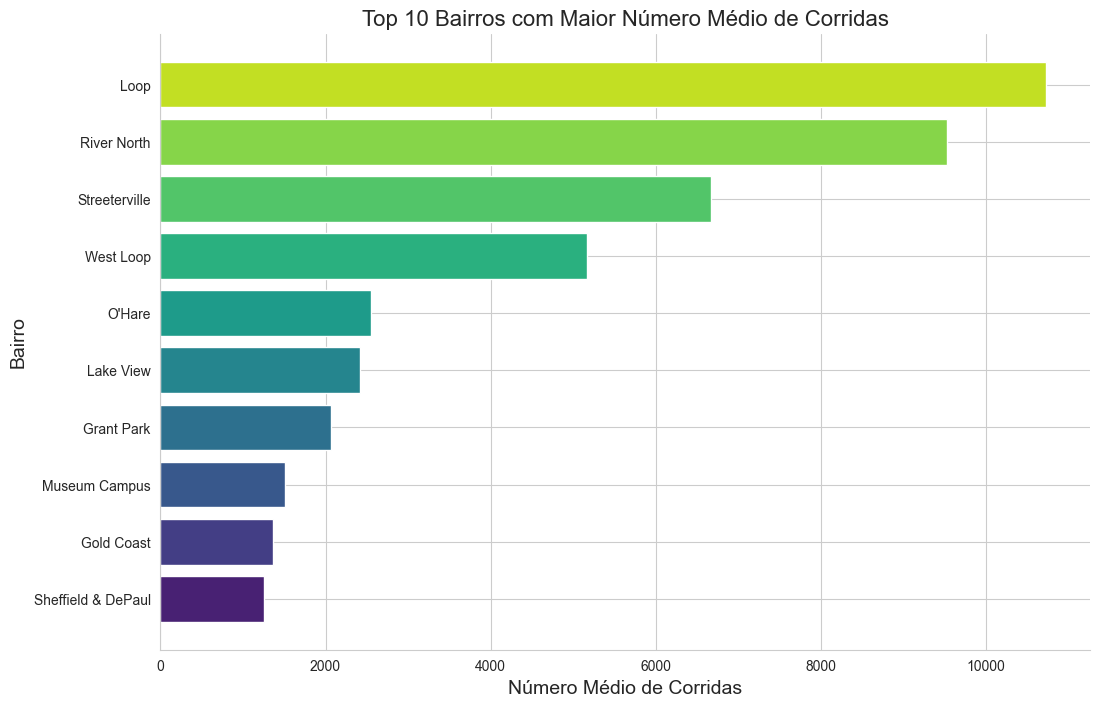

In [8]:

bairros = top_10_bairros['dropoff_location_name']
top_10_bairros = top_10_bairros.sort_values(by='average_trips')

# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Definindo as cores das barras
colors = sns.color_palette("viridis", len(bairros))

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_bairros['dropoff_location_name'],
                top_10_bairros['average_trips'], color=colors)

# Configurando o título e os rótulos dos eixos
plt.xlabel('Número Médio de Corridas', fontsize=14)
plt.ylabel('Bairro', fontsize=14)
plt.title('Top 10 Bairros com Maior Número Médio de Corridas', fontsize=16)

# Removendo moldura do gráfico
sns.despine()

# Mostrando o gráfico
plt.show()

* Com base nos dados apresentados na tabela, podemos fazer as seguintes conclusões sobre o número médio de viagens para cada bairro no mês de novembro de 2017:

    * Loop lidera com a maior média de viagens, indicando uma alta demanda na área central da cidade.
    * River North segue de perto, sugerindo uma forte atividade de transporte em outro bairro central movimentado.
    * Streeterville e West Loop também registram médias significativas, refletindo uma demanda considerável de transporte.
    * O'Hare, apesar de ser um aeroporto importante, tem uma média relativamente menor de viagens, indicando uma demanda estável em comparação com os bairros urbanos.
    * Bairros como Lake View, Grant Park, Museum Campus, Gold Coast e Sheffield & DePaul têm médias intermediárias, refletindo diferentes níveis de atividade e demanda de transporte.

Essas informações destacam a importância de entender os padrões de transporte em diferentes partes da cidade para melhorar o planejamento e a prestação de serviços de transporte.

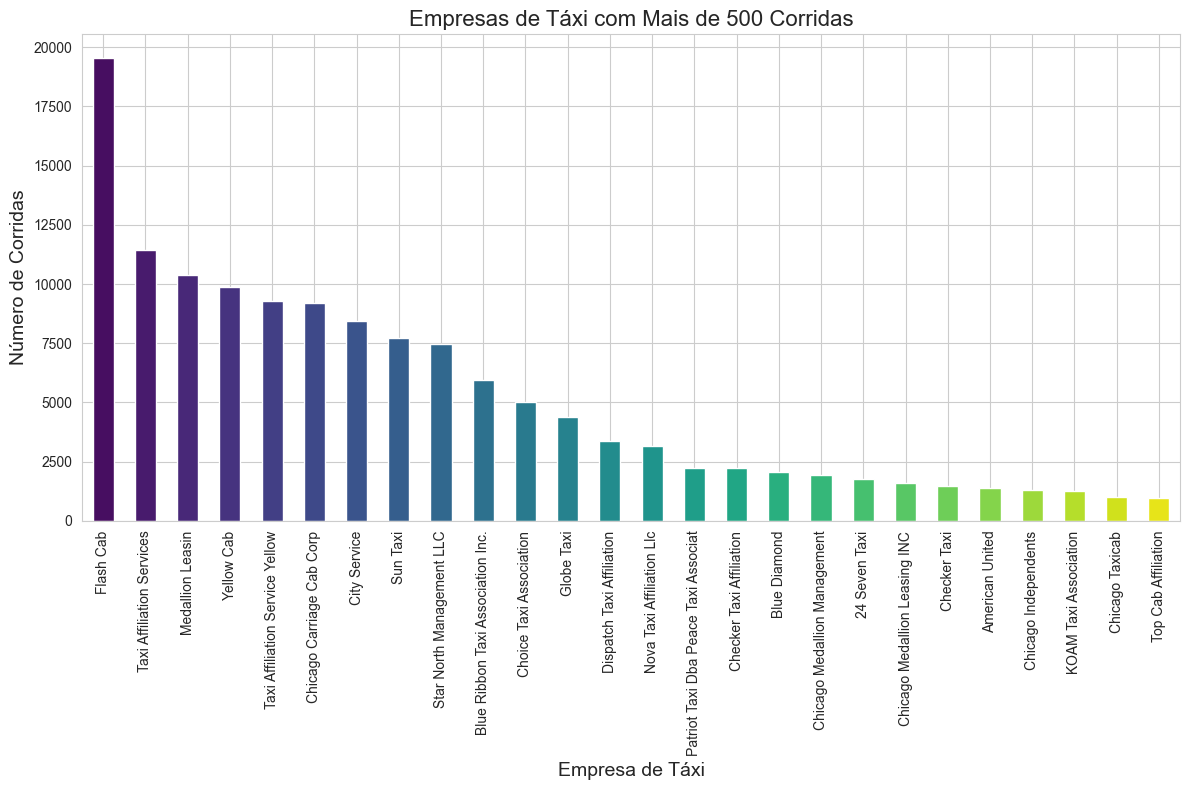

In [9]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Contagem do número de corridas por empresa de táxi
corridas_por_empresa = df_trips.groupby('company_name')['trips_amount'].sum()

# Filtrando apenas as empresas com mais de 100 corridas
corridas_por_empresa = corridas_por_empresa[corridas_por_empresa > 500]

# Ordenando as empresas de táxi com base no número de corridas em ordem decrescente
corridas_por_empresa = corridas_por_empresa.sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
corridas_por_empresa.plot(kind='bar', color=sns.color_palette(
    "viridis", len(corridas_por_empresa)))
plt.xlabel('Empresa de Táxi', fontsize=14)
plt.ylabel('Número de Corridas', fontsize=14)
plt.title(
    'Empresas de Táxi com Mais de 500 Corridas', fontsize=16)
# Rotacionando os nomes das empresas em 90 graus
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Com base nos dados sobre o número de viagens por empresa de táxi em Chicago, podemos verificar que:

* Liderança das Principais Empresas: Empresas como Flash Cab, Taxi Affiliation Services, Medallion Leasin e Yellow Cab estão no topo em termos de volume de viagens, indicando uma forte presença e uma base sólida de clientes.

* Diversidade de Opções: A variedade de empresas de táxi oferece aos passageiros uma ampla gama de opções para escolher, permitindo que selecionem serviços que atendam às suas necessidades específicas.

* Competição Significativa: A presença de várias empresas sugere uma concorrência acirrada no mercado de táxis de Chicago, o que pode resultar em estratégias agressivas para atrair e reter clientes.

* Discrepância de Tamanho: Existem diferenças significativas no número de viagens entre as principais empresas e as menores, o que pode refletir variações na popularidade, cobertura de serviço ou eficácia da gestão.

### Testestando Hipóteses

In [10]:
df_result.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
print("Informações de df_result:")
print()
print(df_result.info())

Informações de df_result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [12]:
# Encontrando os valores únicos da coluna 'weather_conditions'
valores_unicos = df_result['weather_conditions'].unique()

print(valores_unicos)

['Good' 'Bad']


In [13]:
# Filtrando os dados para os passeios em sábados chuvosos
df_bad = df_result[df_result['weather_conditions'] == 'Bad']  # Chuva

# Calculando a média da duração dos passeios para os sábados chuvosos
media_chuvosos = df_bad['duration_seconds'].mean()

# Filtrando os dados para os passeios em sábados não chuvosos
df_good = df_result[df_result['weather_conditions'] == 'Good']  # Sem chuva

# Calculando a média da duração dos passeios para os sábados não chuvosos
media_nao_chuvosos = df_good['duration_seconds'].mean()

print('Média em dias Chuvosos:', media_chuvosos)
print('Média em dias não Chuvosos:', media_nao_chuvosos)



Média em dias Chuvosos: 2427.2055555555557
Média em dias não Chuvosos: 1999.6756756756756


In [14]:
# Calculando a variância da duração dos passeios para os sábados chuvosos
variancia_chuvosos = df_bad['duration_seconds'].var()

# Calculando a variância da duração dos passeios para os sábados não chuvosos
variancia_nao_chuvosos = df_good['duration_seconds'].var()

print('Variância em dias Chuvosos:', variancia_chuvosos)
print('Variância em dias não Chuvosos:', variancia_nao_chuvosos)

Variância em dias Chuvosos: 520294.086002483
Variância em dias não Chuvosos: 576382.009689509


Podemos observar que a variância da duração dos passeios em dias não chuvosos é ligeiramente maior do que em dias chuvosos. Isso indica que, em média, a duração dos passeios em dias não chuvosos tende a variar mais do que em dias chuvosos.

No teste estatístico proposto a seguir, a hipótese nula (H0) é uma afirmação que assume que não há diferença significativa entre as médias da duração dos passeios nos dias chuvosos e nos dias não chuvosos. Em outras palavras, a hipótese nula afirma que a média da duração dos passeios é a mesma, independentemente do tempo estar chuvoso ou não.

A hipótese alternativa (H1) é a afirmação oposta à hipótese nula. Neste caso, a hipótese alternativa sugere que há uma diferença significativa entre as médias da duração dos passeios nos dias chuvosos e nos dias não chuvosos. Portanto, se encontrarmos evidências estatísticas suficientes para rejeitar a hipótese nula, podemos aceitar a hipótese alternativa.

In [15]:
# Definindo os dados
dados_chuvosos = df_bad['duration_seconds']
dados_nao_chuvosos = df_good['duration_seconds']

# Verificando se as variâncias são iguais
equal_var = variancia_chuvosos == variancia_nao_chuvosos
print('Resultado do teste de igualdade das variâncias:', equal_var)

# Realizando o teste t de Student para duas amostras independentes
resultado_teste = stats.ttest_ind(
    dados_chuvosos, dados_nao_chuvosos, equal_var=equal_var)

# Imprimindo o resultado do teste
print("Estatística do teste t:", resultado_teste.statistic)
print("Valor p:", resultado_teste.pvalue)

# Comparando o valor p com o nível de significância alfa
alfa = 0.05
if resultado_teste.pvalue < alfa:
    print("Rejeitar a hipótese nula: A média da duração dos passeios muda nos dias chuvosos.")
else:
    print("Não rejeitar a hipótese nula: Não há evidências suficientes para concluir que a média da duração dos passeios muda nos dias chuvosos.")

Resultado do teste de igualdade das variâncias: False
Estatística do teste t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rejeitar a hipótese nula: A média da duração dos passeios muda nos dias chuvosos.


Foi aplicado o teste t de Student para duas amostras independentes para comparar as médias da duração dos passeios nos dias chuvosos e não chuvosos. 

Neste caso, o valor p foi menor que o nível de significância alfa (0.05), logo podemos rejeitar a hipótese nula e concluir que a média da duração dos passeios muda nos dias chuvosos.

### Conclusões Finais:

#### Viagens

Com base na análise dos dados sobre o número médio de viagens para diferentes bairros de Chicago, sugerimos o seguinte para uma empresa de transporte privado:

* Análise de Rotas e Horários: Utilize os dados para otimizar as rotas e os horários de seus veículos. Concentre-se nos bairros com maior demanda, como Loop, River North e Streeterville, e ajuste a alocação de veículos e motoristas de acordo com os horários de pico de demanda.

* Melhoria da Experiência do Cliente: Concentre-se na experiência do cliente, garantindo tempos de espera mínimos e oferecendo opções de viagem confortáveis e convenientes. Considere a implementação de tecnologias de reserva de viagens e aplicativos móveis para facilitar o acesso aos seus serviços.

* Parcerias Estratégicas: Estabeleça parcerias estratégicas com empresas, hotéis, restaurantes e atrações turísticas nos bairros mais movimentados para oferecer descontos ou pacotes especiais aos clientes. Isso pode atrair mais passageiros e aumentar a fidelidade à marca.

* Diversificação de Serviços: Considere diversificar seus serviços para atender às necessidades específicas de diferentes segmentos de clientes. Por exemplo, ofereça serviços de luxo para clientes corporativos ou opções de compartilhamento de viagens para viajantes individuais ou grupos.

* Investimento em Marketing: Utilize as informações dos dados para direcionar suas estratégias de marketing e publicidade. Destaque os bairros com alta demanda em suas campanhas para atrair mais clientes em potencial.

* Monitoramento Contínuo: Continue monitorando e analisando os dados de desempenho para identificar tendências emergentes, ajustar estratégias conforme necessário e garantir uma operação eficiente e lucrativa.

Ao implementar essas sugestões, a empresa de transporte privado pode maximizar sua eficiência operacional, melhorar a experiência do cliente e aumentar sua participação de mercado em Chicago.

#### Nova Empresa, Mercado e Concorrência

Para uma empresa de transporte privado que está entrando no mercado de Chicago, algumas sugestões estratégicas incluem:

* Pesquisa de Mercado Abrangente: Realize uma pesquisa de mercado abrangente para entender as necessidades e preferências dos passageiros em Chicago. Isso inclui identificar áreas com alta demanda por serviços de transporte, horários de pico de viagem e preferências de pagamento.

* Diferenciação do Serviço: Identifique uma proposta única de valor para diferenciar sua empresa das concorrentes. Isso pode incluir oferecer preços competitivos, carros de alta qualidade, motoristas bem treinados, opções de reserva conveniente e um serviço excepcional ao cliente.

* Tecnologia Avançada: Invista em tecnologia avançada, como aplicativos móveis intuitivos e sistemas de reserva online, para facilitar a reserva de viagens e proporcionar uma experiência conveniente aos clientes. Considere também a implementação de recursos como rastreamento de veículos em tempo real e opções de pagamento digital.

* Parcerias Estratégicas: Estabeleça parcerias estratégicas com hotéis, empresas de turismo, restaurantes e eventos locais para expandir sua base de clientes e aumentar a visibilidade da marca. Ofereça descontos ou promoções exclusivas para os clientes desses parceiros.

* Ênfase na Segurança e Confiabilidade: Priorize a segurança e confiabilidade dos serviços, garantindo que todos os motoristas sejam devidamente licenciados, os veículos passem por manutenção regular e os procedimentos de segurança sejam rigorosamente seguidos. Isso ajudará a construir confiança e lealdade dos clientes.

* Marketing Direcionado: Desenvolva uma estratégia de marketing direcionada para segmentos específicos de clientes em Chicago, como viajantes de negócios, turistas, residentes locais e eventos especiais. Utilize plataformas de mídia social, publicidade digital e campanhas promocionais para alcançar seu público-alvo de forma eficaz.

* Feedback dos Clientes: Esteja aberto ao feedback dos clientes e use-o para melhorar continuamente seus serviços. Implemente sistemas de avaliação de clientes e incentive comentários e sugestões para garantir uma experiência positiva e construir uma reputação sólida no mercado.

#### Transporte e Previsão do Tempo

##### Variação e Teste Estatístico

 A observação de que a variância da duração dos passeios em dias não chuvosos é ligeiramente maior do que em dias chuvosos sugere que há uma maior dispersão ou variação nos dados da duração dos passeios em dias não chuvosos. Em outras palavras, os dados da duração dos passeios em dias não chuvosos tendem a se espalhar mais em torno da média do que em dias chuvosos.

Isso pode ser interpretado como uma indicação de que, em dias não chuvosos, há uma gama mais ampla de atividades ou circunstâncias que afetam a duração dos passeios, levando a uma maior variabilidade nos dados. Por outro lado, em dias chuvosos, as opções de atividades podem ser mais limitadas devido ao clima adverso, resultando em uma menor variação nos dados da duração dos passeios.

Essa observação é consistente com a ideia de que o clima pode influenciar as atividades recreativas das pessoas e, consequentemente, a duração dos passeios, com dias não chuvosos permitindo uma gama mais diversificada de atividades e, portanto, uma maior variação na duração dos passeios.

#### Sugestões

* Adaptação ao Clima: Reconheça a influência do clima nas atividades dos usuários e na demanda por serviços de transporte. Considere estratégias para se adaptar às condições climáticas, como oferecer promoções ou serviços especiais durante períodos de chuva para incentivar o uso do transporte privado.

* Variedade de Serviços: Ofereça uma variedade de serviços que possam atrair usuários em diferentes condições climáticas. Por exemplo, durante dias chuvosos, poderiam ser oferecidos serviços de transporte mais confortáveis ou que ofereçam proteção contra a chuva, enquanto em dias ensolarados, serviços mais voltados para atividades ao ar livre poderiam ser destacados.

* Análise Contínua: Mantenha uma análise contínua dos dados relacionados ao clima e ao comportamento dos usuários para ajustar estratégias de negócios e serviços de acordo com as condições climáticas predominantes.

* Marketing Inteligente: Utilize informações sobre o clima e comportamento dos usuários para direcionar estratégias de marketing mais eficazes. Por exemplo, campanhas promocionais podem ser adaptadas com base nas previsões meteorológicas, destacando os benefícios do serviço de transporte privado em diferentes condições climáticas.

* Flexibilidade Operacional: Mantenha uma certa flexibilidade na operação do serviço para lidar com flutuações na demanda devido às condições climáticas. Isso pode incluir ajustes na disponibilidade de veículos ou na alocação de recursos em tempo real.

* Investimento em Tecnologia: Invista em tecnologia que possa prever e responder rapidamente às mudanças nas condições climáticas e na demanda dos usuários. Isso pode incluir o desenvolvimento de aplicativos móveis com recursos meteorológicos integrados e sistemas de alocação de recursos inteligentes.